**Logististicka regresija ** je model binarne klasifikacije koji pretpostavlja linearnu vezu izmedju ulaznih velicina. Ciljna funkcija logisticke regresije je zadata formulom $f_\beta(X)= \frac{1}{1+e^{-(\beta_0 + \beta_1X_1 + \ldots + \beta_mX_m)}} = \frac{1}{1+e^{-\beta^T X}} = \sigma(\beta^TX)$ gde je $\sigma(x)$ sigmoidna funkcija odredjena jednacinom $\sigma(x) = \frac{1}{1+e^{-x}}$. Vrednost ciljne funkcije se moze interpretirati kao verovatnoca pripadnosti odredjenoj klasi: ukoliko je njena vrednost veca od 0.5, klasifikator predvidja pozitivnu klasu, dok u suprotnom predvidja negativnu klasu. 

<br> 
Parametri modela se odredjuju minimizacijom funkcije gubitka koja je u slucaju logisticke regresije unakrsna entropija odredjena sa $\sum_{i=1}^{N} -y_i logf_\beta(x_i) - (1-y_i)log(1-f_\beta(x_i))$.

U primeru koji sledi bice reci o klasifikaciji tumora na maligne i benigne. 

In [5]:
import numpy as np
import pandas as pd

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [8]:
data = datasets.load_breast_cancer()

### Analiza podataka

In [9]:
#print(data.DESCR)

In [10]:
x = pd.DataFrame(data.data, columns = data.feature_names)

In [11]:
x.shape

(569, 30)

In [12]:
data.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [13]:
y = data.target

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [15]:
x.min(axis = 0)

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [16]:
x.max(axis = 0)

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

Atributi uzimaju vrednosti na razlicitim skalama. 

In [17]:
print("Original dataset - Benign: {b}, Malignant: {m}".format(b=np.sum(y == 1), m= np.sum(y == 0)))

Original dataset - Benign: 357, Malignant: 212


Prilikom podele skupa podataka na skupove za treniranje i testiranje, voditi racuna o stratifikaciji.

In [18]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7, stratify = y )

In [19]:
print("Train dataset - Benign: {b}, Malignant: {m}".format(b=np.sum(y_train == 1), m= np.sum(y_train == 0)))

Train dataset - Benign: 239, Malignant: 142


In [20]:
print("Test dataset - Benign: {b}, Malignant: {m}".format(b=np.sum(y_test == 1), m= np.sum(y_test == 0)))

Test dataset - Benign: 118, Malignant: 70


In [21]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

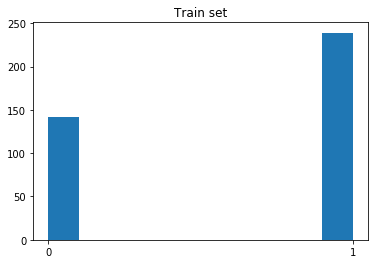

In [22]:
plt.title("Train set")
plt.xticks([0,1])
plt.hist(y_train);

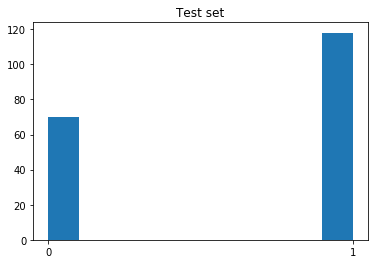

In [23]:
plt.title("Test set")
plt.xticks([0, 1])
plt.hist(y_test);

### Ucenje modela

In [24]:
model = linear_model.LogisticRegression()

In [25]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Rezultujuci parametri se mogu procitati kroz intercept_ i coef_svojstva.

In [26]:
model.intercept_

array([ 0.26862964])

In [27]:
model.coef_

array([[-0.27544023, -0.50084558, -0.29832841, -0.44222808, -0.08345319,
         0.47774684, -0.64537462, -0.58458543, -0.19299068,  0.27567901,
        -1.09019124,  0.18326243, -0.5666638 , -0.91496324, -0.0730358 ,
         0.81075687, -0.14531782, -0.40100136,  0.26422463,  0.43892385,
        -0.95668819, -1.14486767, -0.75504657, -1.00071393, -0.58473687,
         0.08872894, -0.72647006, -0.89528128, -0.69997844, -0.6512288 ]])

### Evaluacija

In [28]:
y_test_predicted = model.predict(x_test)

In [29]:
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [30]:
y_train_predicted = model.predict(x_train)

In [31]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)

In [32]:
print("Train score: {train}, test score: {test}".format(train=train_score, test=test_score))

Train score: 0.989501312335958, test score: 0.9787234042553191


In [33]:
#vrlo verovatno da dolazi do preprilagodjavanja - treba podesiti parametre modela

In [41]:
# ocena verovatnoca pripadnosti klasama
y_probabilities_predicted = model.predict_proba(x_test)
#y_probabilities_predicted

### Koricenje modela

In [42]:
final_model = model.fit(x, y)

In [50]:
x_new = np.random.randn(30)

In [51]:
y_new = model.predict(x_new.reshape(1, -1))
print ('Benign' if y_new == 1 else 'Malignant')

Benign


In [60]:
probabilities = model.predict_proba(x_new.reshape(1, -1))
print ('Benign: %f, malignant: %f' % (probabilities[0, 1], probabilities[0, 0]))

Benign: 0.951456, malignant: 0.048544
